In [4]:
import pandas as pd
import load_data

In [5]:
df = load_data.get_df()

In [6]:
df.shape

(988, 3)

In [7]:
df.columns

Index(['URLS', 'Headline', 'Article'], dtype='object')

In [8]:
df.head()

,URLS,Headline,Article
0,/business/economy/opinion/news/averting-fiscal...,Averting fiscal crises in a deteriorating glob...,The war in Ukraine and aftershocks from the Co...
1,/opinion/views/news/remembering-the-queens-leg...,"In remembering the 'Queen's legacy', why do we...",When news broke of the death of Queen Elizabet...
2,/news/bangladesh/news/temple-idol-vandalised-j...,Temple idol vandalised in Jhenidah,Unidentified miscreants vandalised an idol of ...
3,/news/bangladesh/crime-justice/news/attack-bcl...,"""Attack on BCL men"": 24 Chhatra Odhikar Parish...",A Dhaka court has sent 24 leaders and activist...
4,/opinion/views/news/shanghai-cooperation-organ...,Shanghai Cooperation Organization Summit 2022:...,The Shanghai Cooperation Organization's (SCO) ...


#### Preliminary text exploration

In [9]:
# Fetch the word_cound for each headline
df['word_count_headline'] = df['Headline'].apply(
    lambda x: len(str(x).split(" "))
)

In [10]:
df[['Headline','word_count_headline']].head(10)

,Headline,word_count_headline
0,Averting fiscal crises in a deteriorating glob...,9
1,"In remembering the 'Queen's legacy', why do we...",14
2,Temple idol vandalised in Jhenidah,5
3,"""Attack on BCL men"": 24 Chhatra Odhikar Parish...",12
4,Shanghai Cooperation Organization Summit 2022:...,9
5,Hoolock rescued in Ctg; 2 detained,6
6,4 killed in Gopalganj road crash,7
7,An unusual gift for Putin on his 70th birthday,9
8,Seminar on managing pain held,5
9,OPEC+ oil output cut shows widening rift betwe...,12


In [11]:
df.word_count_headline.value_counts()

8     155
7     148
9     131
6     120
10    109
5     104
11     66
12     51
4      44
13     19
3      16
14     12
2       7
16      2
17      1
15      1
21      1
19      1
Name: word_count_headline, dtype: int64

In [12]:
df.word_count_headline.describe()

count    988.000000
mean       7.975709
std        2.536745
min        2.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       21.000000
Name: word_count_headline, dtype: float64

#### Most common and uncommon words

In [13]:
# Identify common words
freq = pd.Series(' '.join(df['Headline']).split()).value_counts()[:20]

In [14]:
freq

to            244
in            235
for           124
of            124
the            95
on             68
a              53
at             49
as             47
with           42
after          35
from           35
and            32
more           29
2              29
Bangladesh     28
by             27
Dhaka          23
be             21
killed         20
dtype: int64

In [15]:
# Identify uncommon words 
# Identify common words
freq = pd.Series(' '.join(df['Headline']).split()).value_counts()[-20:]

In [16]:
freq

Insurance         1
representative    1
nod               1
NBL               1
director          1
KIFF’s            1
budget            1
16                1
Online            1
begins,           1
Chattogram        1
powers            1
heritage?         1
‘Girls            1
fools,            1
hearts’:          1
Sabnam            1
Faria             1
unity             1
stole             1
dtype: int64

#### Text Preprocessing

In [17]:
# Importing dependencies
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

In [18]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also",
             "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [19]:
df.reset_index(inplace=True)
corpus = []
for i in range(len(df)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', df['Headline'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [20]:
corpus[:10]

['averting fiscal crisis deteriorating global economic environment',
 'remembering queen legacy forget suffering ancestor',
 'temple idol vandalised jhenidah',
 'attack bcl men chhatra odhikar parishad activist sent jail',
 'shanghai cooperation organization summit context direction',
 'hoolock rescued ctg detained',
 'killed gopalganj road crash',
 'unusual gift putin th birthday',
 'seminar managing pain held',
 'opec oil output cut show widening rift biden saudi royal']

In [21]:
len(corpus)

988

In [22]:
corpus[3]

'attack bcl men chhatra odhikar parishad activist sent jail'

#### Data Exploration

In [23]:
# Word Cloud
from os import path 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=stop_words,
    max_words=50,
    max_font_size=50,
    random_state=42
).generate(str(corpus))

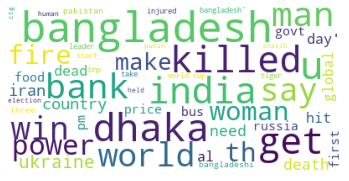

In [25]:
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [26]:
fig.savefig("word1.png", dpi=900)

#### Text Preparation
- Tokenization
- Vectorization

#### Creating a vector of word counts

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
cv = CountVectorizer(
    max_df=0.8,
    stop_words=stop_words,
    max_features=1000,
    ngram_range=(1,3)
)

In [29]:
X = cv.fit_transform(corpus)

In [30]:
list(cv.vocabulary_.keys())[:10]

['crisis',
 'global',
 'economic',
 'environment',
 'global economic',
 'remembering',
 'queen',
 'suffering',
 'attack',
 'bcl']

#### Visualizing top N uni-grams,bi-grames and tri_grams

[Text(0, 0, 'bangladesh'),
 Text(1, 0, 'world'),
 Text(2, 0, 'dhaka'),
 Text(3, 0, 'death'),
 Text(4, 0, 'india'),
 Text(5, 0, 'killed'),
 Text(6, 0, 'get'),
 Text(7, 0, 'win'),
 Text(8, 0, 'day'),
 Text(9, 0, 'bank'),
 Text(10, 0, 'man'),
 Text(11, 0, 'fire'),
 Text(12, 0, 'iran'),
 Text(13, 0, 'woman'),
 Text(14, 0, 'ukraine'),
 Text(15, 0, 'power'),
 Text(16, 0, 'covid'),
 Text(17, 0, 'say'),
 Text(18, 0, 'pm'),
 Text(19, 0, 'ctg')]

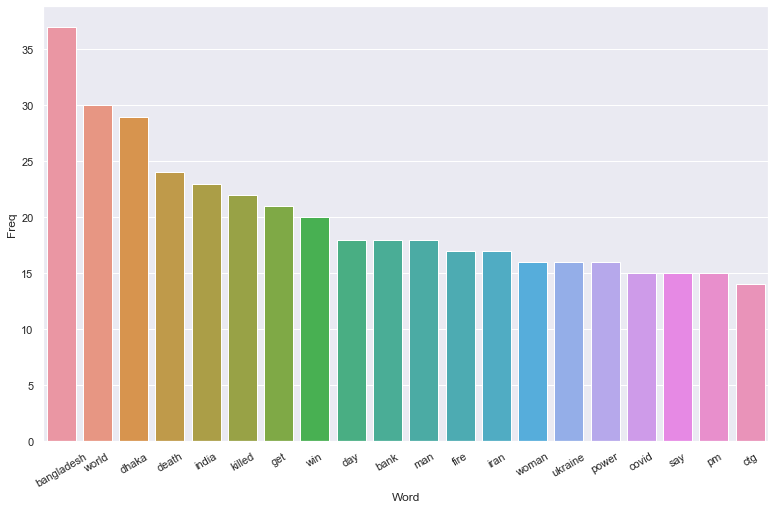

In [31]:
# Most frequently occuring words
import seaborn as sns


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [
        (word, sum_words[0, idx]) for word, idx in
        vec.vocabulary_.items()
    ]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize': (13, 8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

             Bi-gram  Freq
0          world cup    13
1      mental health     7
2            bcl men     6
3    positivity rate     6
4          sri lanka     6
5     gaibandha poll     6
6    chhatra odhikar     5
7      hr positivity     5
8          pass away     5
9          sent jail     4
10     social medium     4
11         die covid     4
12          year old     4
13       covid death     4
14       mahsa amini     4
15     load shedding     4
16       nobel prize     4
17       murder case     4
18       kabir suman     4
19  odhikar parishad     3


[Text(0, 0, 'world cup'),
 Text(1, 0, 'mental health'),
 Text(2, 0, 'bcl men'),
 Text(3, 0, 'positivity rate'),
 Text(4, 0, 'sri lanka'),
 Text(5, 0, 'gaibandha poll'),
 Text(6, 0, 'chhatra odhikar'),
 Text(7, 0, 'hr positivity'),
 Text(8, 0, 'pass away'),
 Text(9, 0, 'sent jail'),
 Text(10, 0, 'social medium'),
 Text(11, 0, 'die covid'),
 Text(12, 0, 'year old'),
 Text(13, 0, 'covid death'),
 Text(14, 0, 'mahsa amini'),
 Text(15, 0, 'load shedding'),
 Text(16, 0, 'nobel prize'),
 Text(17, 0, 'murder case'),
 Text(18, 0, 'kabir suman'),
 Text(19, 0, 'odhikar parishad')]

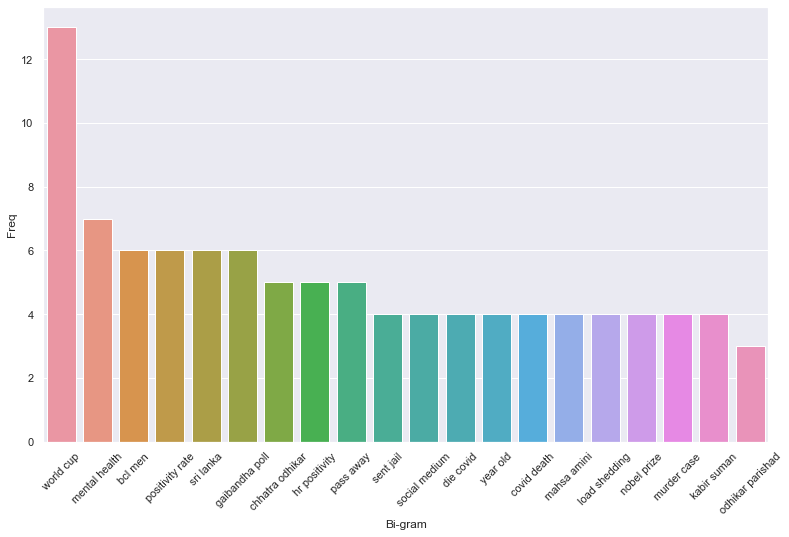

In [32]:
#Most frequently occuring Bi-grams

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2, 2),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize': (13, 8)})
h = sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)


                      Tri-gram  Freq
0           hr positivity rate     5
1     chhatra odhikar parishad     3
2               covid death hr     3
3          death hr positivity     3
4    odhikar parishad activist     2
5              output cut show     2
6             rift biden saudi     2
7            biden saudi royal     2
8   bangladesh wedding couture     2
9         wedding couture week     2
10           couture week bwcw     2
11           killed road crash     2
12         dengue grip rooppur     2
13          grip rooppur plant     2
14            world cup opener     2
15              death toll hit     2
16        everything need know     2
17      bangladeshi killed bsf     2
18                 top la liga     2
19         strike ukraine city     2


[Text(0, 0, 'hr positivity rate'),
 Text(1, 0, 'chhatra odhikar parishad'),
 Text(2, 0, 'covid death hr'),
 Text(3, 0, 'death hr positivity'),
 Text(4, 0, 'odhikar parishad activist'),
 Text(5, 0, 'output cut show'),
 Text(6, 0, 'rift biden saudi'),
 Text(7, 0, 'biden saudi royal'),
 Text(8, 0, 'bangladesh wedding couture'),
 Text(9, 0, 'wedding couture week'),
 Text(10, 0, 'couture week bwcw'),
 Text(11, 0, 'killed road crash'),
 Text(12, 0, 'dengue grip rooppur'),
 Text(13, 0, 'grip rooppur plant'),
 Text(14, 0, 'world cup opener'),
 Text(15, 0, 'death toll hit'),
 Text(16, 0, 'everything need know'),
 Text(17, 0, 'bangladeshi killed bsf'),
 Text(18, 0, 'top la liga'),
 Text(19, 0, 'strike ukraine city')]

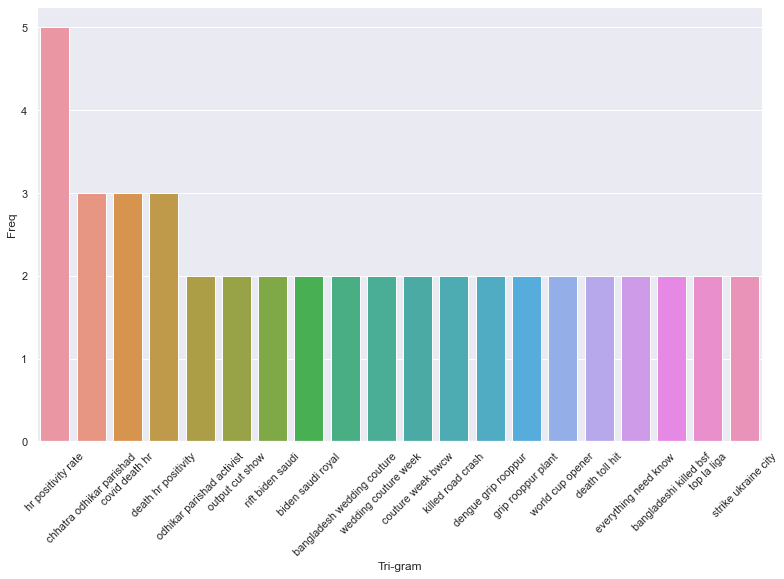

In [33]:
#Most frequently occuring Tri-grams

def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3, 3),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize': (13, 8)})
j = sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)


#### Converting to a Matrix of Integers
- TF-IDF

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(
    smooth_idf=True,
    use_idf=True
)

tfidf_transformer.fit(X)

TfidfTransformer()

In [35]:
# Get feature names
feature_names = cv.get_feature_names_out()

# fetch document for which keywords needs to be extracted
doc=corpus[32]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [36]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [37]:
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nHeadline:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Headline:
year old gang raped kamalapur station arrested

Keywords:
gang raped 0.367
raped 0.351
kamalapur 0.351
gang 0.351
year old 0.339
